# 15. Rock, Paper, [?] ?

The Digital Repository of Ireland contains many digitised collections, one of which is from 



In [9]:
import sys
sys.path.append("/Users/digitalmediaadmin/Git/ivpy/src")

In [54]:
import requests
from ivpy import attach,show,compose,montage,histogram,scatter
import pandas as pd
import altair as alt
req = pd.read_csv('https://api.vam.ac.uk/v2/objects/search?images_exist=true&page=1&page_size=15&q=marbled+paper&search_mode=random&response_format=csv')
req.head()

,accessionNumber,accessionYear,systemNumber,objectType,_primaryTitle,_primaryPlace,_primaryMaker__name,_primaryMaker__association,_primaryDate,_primaryImageId,_sampleMaterial,_sampleTechnique,_sampleStyle,_currentLocation__displayName,_objectContentWarning,_imageContentWarning
0,E.1444-1959,1959,O567737,Paper,NaN,Britain,E. W. Morris,made,1886,2022NF4035,paper,marbling,NaN,"Prints & Drawings Study Room, level C",False,False
1,E.1441-1959,1959,O567740,Paper,NaN,Britain,E. W. Morris,made,1886,2022NF4045,paper,marbling,NaN,"Prints & Drawings Study Room, level C",False,False
2,E.1442-1959,1959,O567739,Paper,NaN,Britain,E. W. Morris,made,1886,2022NF4044,paper,marbling,NaN,"Prints & Drawings Study Room, level C",False,False
3,E.1451-1959,1959,O567730,Paper,NaN,Britain,E. W. Morris,made,1886,2022NF4039,paper,marbling,NaN,"Prints & Drawings Study Room, level C",False,False
4,E.1443-1959,1959,O567738,Paper,NaN,Britain,E. W. Morris,made,1886,2022NF4034,paper,marbling,NaN,"Prints & Drawings Study Room, level C",False,False


In [55]:
IIIF_IMAGE_URL = "https://framemark.vam.ac.uk/collections/%s/full/!100,100/0/default.jpg"
req._primaryImageId = [IIIF_IMAGE_URL % item for item in req._primaryImageId]

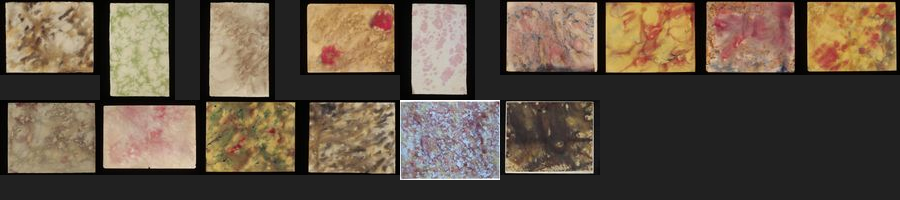

In [56]:
attach(req, "_primaryImageId")
show()

In [14]:
req_dri = requests.get('https://repository.dri.ie/iiif/q524zh496/sequence.json')
stone_axe_slices = req_dri.json()

In [33]:
import random

axe_samples = []
for canvas in random.choices(stone_axe_slices['sequences'][0]['canvases'], k=10):
    print(canvas['images'][0]['resource']['@id'])
    thumbnail_img = canvas['images'][0]['resource']['@id'].replace("/full/full/", "/full/!100,100/")
    axe_samples.append(thumbnail_img)

axe_df = pd.DataFrame(axe_samples, columns = ['_primaryImageId'])

axe_df
    

https://repository.dri.ie/loris/0000ct77g:0574fm45x/full/full/0/default.jpg
https://repository.dri.ie/loris/xd07wn42n:xg94xj26g/full/full/0/default.jpg
https://repository.dri.ie/loris/sb39n402p:sj13pw70x/full/full/0/default.jpg
https://repository.dri.ie/loris/k643qv93m:k930rr77g/full/full/0/default.jpg
https://repository.dri.ie/loris/r78299738:rb69b657d/full/full/0/default.jpg
https://repository.dri.ie/loris/5138z8624:57131230g/full/full/0/default.jpg
https://repository.dri.ie/loris/4j03st40j:4q77vm08h/full/full/0/default.jpg
https://repository.dri.ie/loris/r2087j065:r4958d90p/full/full/0/default.jpg
https://repository.dri.ie/loris/tb09z138q:th840t06v/full/full/0/default.jpg
https://repository.dri.ie/loris/t148vb87n:t722x455v/full/full/0/default.jpg


,_primaryImageId
0,https://repository.dri.ie/loris/0000ct77g:0574...
1,https://repository.dri.ie/loris/xd07wn42n:xg94...
2,https://repository.dri.ie/loris/sb39n402p:sj13...
3,https://repository.dri.ie/loris/k643qv93m:k930...
4,https://repository.dri.ie/loris/r78299738:rb69...
5,https://repository.dri.ie/loris/5138z8624:5713...
6,https://repository.dri.ie/loris/4j03st40j:4q77...
7,https://repository.dri.ie/loris/r2087j065:r495...
8,https://repository.dri.ie/loris/tb09z138q:th84...
9,https://repository.dri.ie/loris/t148vb87n:t722...


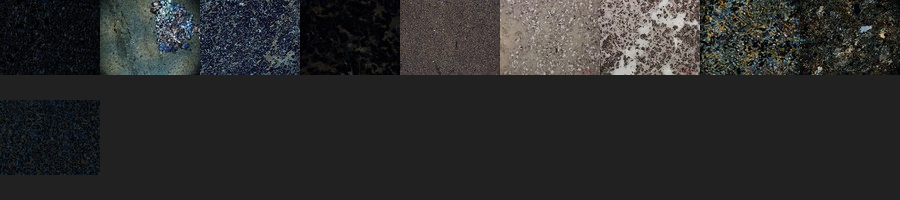

In [23]:
attach(axe_df, "_primaryImageId")
show()

Now to merge the two together and make it a challenge to identify rock or paper!

In [57]:
mixed_images = req["_primaryImageId"]._append(axe_df["_primaryImageId"], ignore_index=True)

In [58]:
game_images = pd.DataFrame(mixed_images).sample(10)

In [59]:
game_images

,_primaryImageId
1,https://framemark.vam.ac.uk/collections/2022NF...
13,https://framemark.vam.ac.uk/collections/2016JP...
19,https://repository.dri.ie/loris/r78299738:rb69...
12,https://framemark.vam.ac.uk/collections/2022NF...
24,https://repository.dri.ie/loris/t148vb87n:t722...
14,https://framemark.vam.ac.uk/collections/2022NF...
2,https://framemark.vam.ac.uk/collections/2022NF...
0,https://framemark.vam.ac.uk/collections/2022NF...
20,https://repository.dri.ie/loris/5138z8624:5713...
3,https://framemark.vam.ac.uk/collections/2022NF...


In [60]:
attach(game_images, "_primaryImageId")

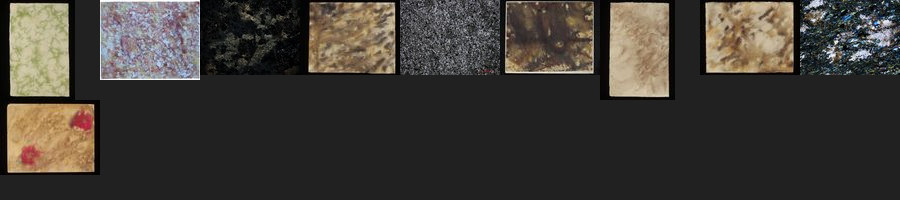

In [61]:
show()